
# **Import libraries and load data.**

This section import the necessary libraries and load the dataset that will be used

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Load the dataset
df = pd.read_csv('ad_click_dataset.csv')

# **Data Exploration**

In this section we explore the dataset to understand its structure and content

In [ ]:
#Display the first few rows of the dataset
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [ ]:
#Show Basic dataset information like shape, columns, null values, and data types
print(f"Dataset shape: {df.shape}\n")
print(f"Columns: {df.columns}\n")
print(f"Missing values:\n{df.isnull().sum()}\n")
print(f"Data types:\n{df.dtypes}")



Dataset shape: (10000, 9)

Columns: Index(['id', 'full_name', 'age', 'gender', 'device_type', 'ad_position',
       'browsing_history', 'time_of_day', 'click'],
      dtype='object')

Missing values:
id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

Data types:
id                    int64
full_name            object
age                 float64
gender               object
device_type          object
ad_position          object
browsing_history     object
time_of_day          object
click                 int64
dtype: object


In [ ]:
#Show Basic statistics of the dataset
print(df.describe(include='all'))

                  id full_name          age  gender device_type ad_position  \
count   10000.000000     10000  5234.000000    5307        8000        8000   
unique           NaN      4000          NaN       3           3           3   
top              NaN  User1171          NaN  Female     Desktop      Bottom   
freq             NaN        25          NaN    1834        2754        2817   
mean     5060.211400       NaN    40.197363     NaN         NaN         NaN   
std      2861.758265       NaN    13.126420     NaN         NaN         NaN   
min         5.000000       NaN    18.000000     NaN         NaN         NaN   
25%      2529.000000       NaN    29.000000     NaN         NaN         NaN   
50%      5218.000000       NaN    39.500000     NaN         NaN         NaN   
75%      7466.000000       NaN    52.000000     NaN         NaN         NaN   
max     10000.000000       NaN    64.000000     NaN         NaN         NaN   

       browsing_history time_of_day         click  

<ipython-input-6-b9342f7df874>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='click', palette=palette)


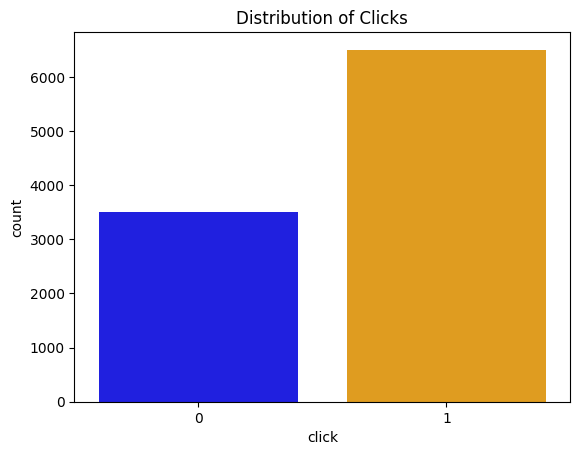

In [ ]:
# Show the Distribution of independent variable 'click'
palette = ['blue', 'orange']
sns.countplot(data=df, x='click', palette=palette)
plt.title('Distribution of Clicks')
plt.show()

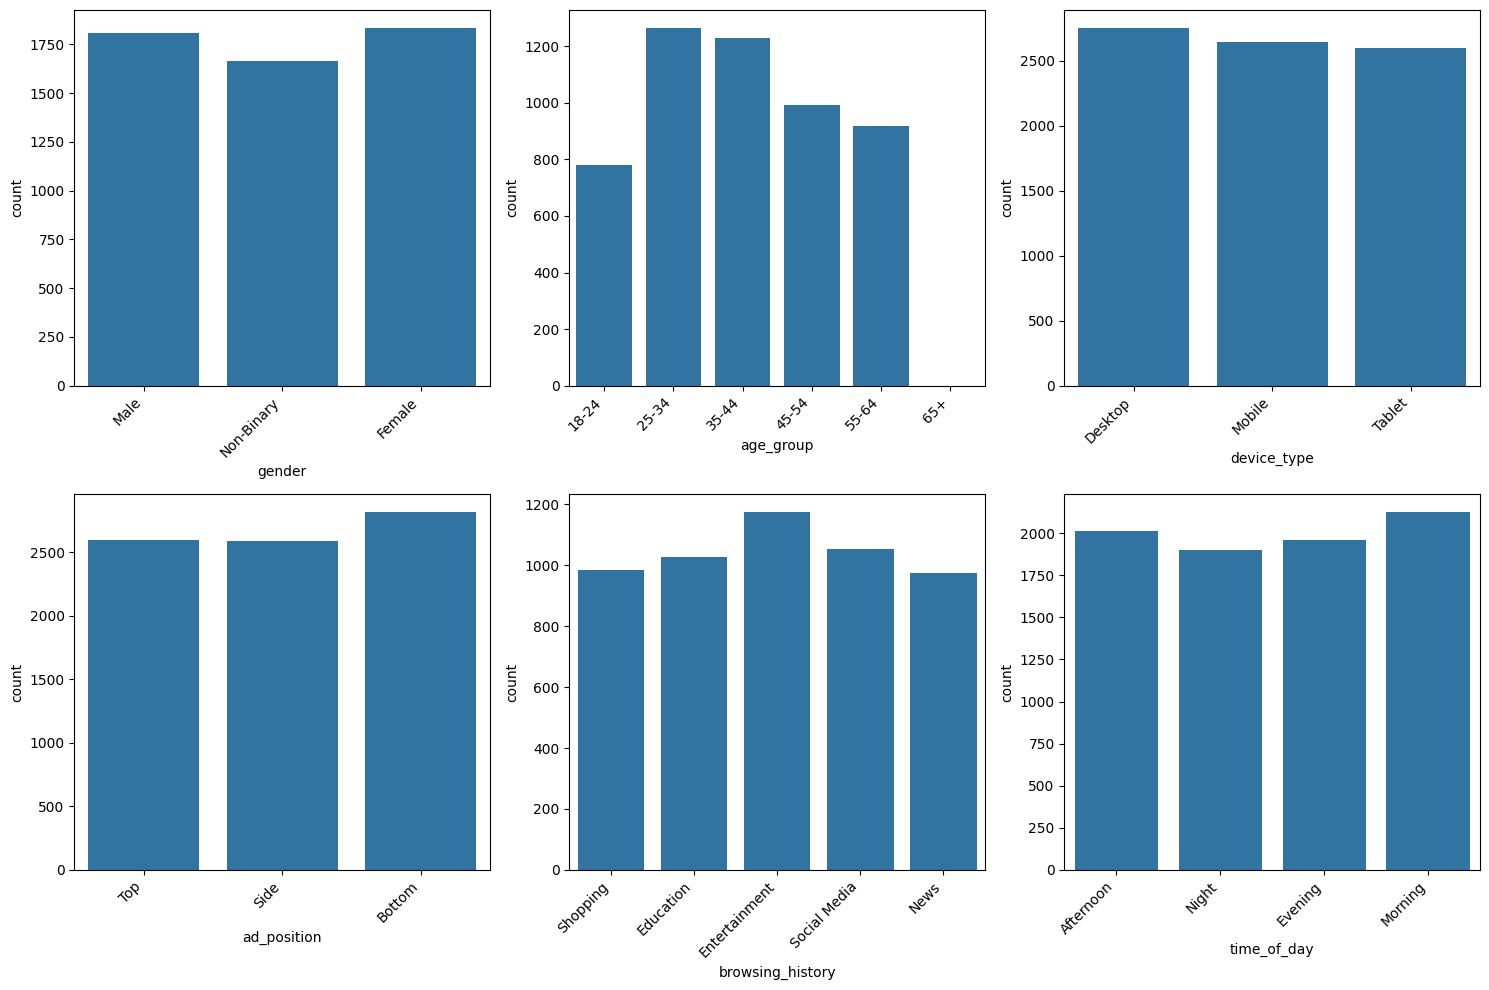

In [ ]:
# Show the Distribution of relevant features
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.subplot(2, 3, 1)
sns.countplot(x=df["gender"])
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 3, 2)
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, np.inf],
                        labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
sns.countplot(x=df["age_group"])
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 3, 3)
sns.countplot(x=df["device_type"])
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 3, 4)
sns.countplot(x=df["ad_position"])
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 3, 5)
sns.countplot(x=df["browsing_history"])
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 3, 6)
sns.countplot(x=df["time_of_day"])
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



In [ ]:
# age is the original feature, age group column is only used for visualization
df = df.drop('age_group', axis=1)


In [ ]:
click_distribution = df['click'].value_counts()
print(click_distribution)

click
1    6500
0    3500
Name: count, dtype: int64


# **Data Pre-Processing**

In this section, we prepare the data for training

In [ ]:
#check the number of null values in the data
df.isnull().sum()

,0
id,0
full_name,0
age,4766
gender,4693
device_type,2000
ad_position,2000
browsing_history,4782
time_of_day,2000
click,0


In [ ]:
"""
our dataset contains mainly of categorical features excluding one feature "age".
We will use the numerical feature value's mean to fill it's
null values and use mode to fill the rest.
"""
# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=np.number).columns
categorical_features = df.select_dtypes(exclude=np.number).columns

# Impute numerical features with the mean
for feature in numerical_features:
    if df[feature].isnull().any():
        df[feature] = df[feature].fillna(df[feature].mean())

# Impute categorical features with the mode
for feature in categorical_features:
    if df[feature].isnull().any():
        df[feature] = df[feature].fillna(df[feature].mode()[0])



In [ ]:
# Verify that there are no more null values
print(df.isnull().sum())

id                  0
full_name           0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64


In [ ]:
# remove irrelevant features
df.drop(columns=['full_name'],inplace=True)
df.drop(columns=['id'],inplace=True)

In [ ]:
# check the number of unique values for each feature
for column in df.columns:
    if column != 'click':
        num_unique_values = df[column].nunique()
        print(f"Number of unique values in '{column}': {num_unique_values}")

Number of unique values in 'age': 48
Number of unique values in 'gender': 3
Number of unique values in 'device_type': 3
Number of unique values in 'ad_position': 3
Number of unique values in 'browsing_history': 5
Number of unique values in 'time_of_day': 4


In [ ]:
"""
since most of the Categorical features has few unique values
we could use oneHotEncoder to convert each value into a boolean value
"""
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
categories = ["gender","device_type","ad_position","browsing_history","time_of_day"]
df1 = pd.get_dummies(df,categories)
df1.head()

,age,click,gender_Female,gender_Male,gender_Non-Binary,device_type_Desktop,device_type_Mobile,device_type_Tablet,ad_position_Bottom,ad_position_Side,ad_position_Top,browsing_history_Education,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,22.000000,1,True,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False
1,40.197363,1,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False
2,41.000000,1,False,False,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True
3,34.000000,1,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False
4,39.000000,0,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False


In [ ]:
# see the overview of the pre-processed dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             10000 non-null  float64
 1   click                           10000 non-null  int64  
 2   gender_Female                   10000 non-null  bool   
 3   gender_Male                     10000 non-null  bool   
 4   gender_Non-Binary               10000 non-null  bool   
 5   device_type_Desktop             10000 non-null  bool   
 6   device_type_Mobile              10000 non-null  bool   
 7   device_type_Tablet              10000 non-null  bool   
 8   ad_position_Bottom              10000 non-null  bool   
 9   ad_position_Side                10000 non-null  bool   
 10  ad_position_Top                 10000 non-null  bool   
 11  browsing_history_Education      10000 non-null  bool   
 12  browsing_history_Entertainment  1

# Modelling

Train and test

In [ ]:

from imblearn.over_sampling import RandomOverSampler
x = df1.drop(["click"],axis=1)
y = df1["click"]
# Create RandomOverSampler object
ros = RandomOverSampler(random_state=42)  # You can change the random_state if needed

# Resample the data
x_resampled, y_resampled = ros.fit_resample(x, y)
# Show the Distribution of independent variable 'click'


y_resampled.value_counts()



,count
click,
1,6500
0,6500


In [ ]:
# split data into train and test data
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [ ]:
#import models, metrics, and cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# Parameter Searching for KNN
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {'n_neighbors': range(1, 31)}  # Try values from 1 to 20

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(x_train, y_train)

accuracy_scores = grid_search.cv_results_['mean_test_score']

for score in accuracy_scores:
    print(score)

# Get the best n_neighbors value
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best n_neighbors: {best_n_neighbors}")

# Assuming 'grid_search' is your GridSearchCV object
results = pd.DataFrame({
    'Neighbor Count': grid_search.cv_results_['param_n_neighbors'].data,
    'Accuracy Score': grid_search.cv_results_['mean_test_score']
})

results.head(31) #to view the output

0.6792499999999999
0.638375
0.68625
0.6639999999999999
0.6915
0.679375
0.6900000000000001
0.686875
0.6892500000000001
0.6796249999999999
0.683875
0.683125
0.681875
0.6815
0.678375
0.676375
0.674875
0.6766250000000001
0.6715
0.6686249999999999
0.669625
0.667
0.6685000000000001
0.668625
0.6705
0.669375
0.668875
0.66875
0.668625
0.6677500000000001
Best n_neighbors: 5


,Neighbor Count,Accuracy Score
0,1,0.679250
1,2,0.638375
2,3,0.686250
3,4,0.664000
4,5,0.691500
5,6,0.679375
6,7,0.690000
7,8,0.686875
8,9,0.689250
9,10,0.679625


In [ ]:
#use the best n neighbor to train using knn
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(x_train, y_train)
y_pred_knn = knn_classifier.predict(x_test)



In [ ]:
param_grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
}
from sklearn.model_selection import GridSearchCV

# Initialize Multinomial Naive Bayes model
mnb = MultinomialNB()

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(mnb, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(x_train, y_train)

# Access and print all scores
results = grid_search.cv_results_
for mean_train_score, mean_test_score, params in zip(results['mean_train_score'], results['mean_test_score'], results['params']):
    print(f"Parameters: {params}, Mean Train Score: {mean_train_score:.4f}, Mean Test Score: {mean_test_score:.4f}")

# Output best parameters and accuracy score (as before)
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Parameters: {'alpha': 0.0001}, Mean Train Score: 0.6510, Mean Test Score: 0.6509
Parameters: {'alpha': 0.001}, Mean Train Score: 0.6510, Mean Test Score: 0.6509
Parameters: {'alpha': 0.01}, Mean Train Score: 0.6510, Mean Test Score: 0.6509
Parameters: {'alpha': 0.1}, Mean Train Score: 0.6510, Mean Test Score: 0.6506
Parameters: {'alpha': 1}, Mean Train Score: 0.6510, Mean Test Score: 0.6506
Parameters: {'alpha': 10}, Mean Train Score: 0.6511, Mean Test Score: 0.6510
Parameters: {'alpha': 100}, Mean Train Score: 0.6514, Mean Test Score: 0.6514
Parameters: {'alpha': 1000}, Mean Train Score: 0.6506, Mean Test Score: 0.6506

Best Parameters: {'alpha': 100}
Best Cross-Validation Score: 0.651375


In [ ]:
from sklearn.naive_bayes import MultinomialNB
# 1. Create and Train the Multinomial Naive Bayes Classifier
mnb_classifier = MultinomialNB(alpha = 100)
mnb_classifier.fit(x_train, y_train)
y_pred_mnb = mnb_classifier.predict(x_test)


In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1]  # Different values for C
}

log_reg = LogisticRegression()

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='accuracy', cv=5, return_train_score=True)
grid_search.fit(x_train, y_train)

# Access and print all scores
results = grid_search.cv_results_
for mean_train_score, mean_test_score, params in zip(results['mean_train_score'], results['mean_test_score'], results['params']):
    print(f"Parameters: {params}, Mean Train Score: {mean_train_score:.4f}, Mean Test Score: {mean_test_score:.4f}")

# Output best parameters and accuracy score (as before)
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Parameters: {'C': 0.001}, Mean Train Score: 0.6506, Mean Test Score: 0.6506
Parameters: {'C': 0.01}, Mean Train Score: 0.6510, Mean Test Score: 0.6511
Parameters: {'C': 0.1}, Mean Train Score: 0.6506, Mean Test Score: 0.6514
Parameters: {'C': 1}, Mean Train Score: 0.6507, Mean Test Score: 0.6512

Best Parameters: {'C': 0.1}
Best Cross-Validation Score: 0.651375


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 1. Create and Train the Logistic Regression Classifier
lr_classifier = LogisticRegression(max_iter=500, C = 0.1, random_state=42)
lr_classifier.fit(x_train, y_train)
y_pred_lr = lr_classifier.predict(x_test)




In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1]
}

svc = SVC()

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, return_train_score=True)

grid_search.fit(x_train, y_train)


results = grid_search.cv_results_
for mean_train_score, mean_test_score, params in zip(results['mean_train_score'], results['mean_test_score'], results['params']):
    print(f"Parameters: {params}, Mean Train Score: {mean_train_score:.4f}, Mean Test Score: {mean_test_score:.4f}")


print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


best_params = grid_search.best_params_
print(f"The best C value is: {best_params['C']}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ............................................C=0.001; total time=   1.9s
[CV] END ............................................C=0.001; total time=   2.0s
[CV] END ............................................C=0.001; total time=   2.7s
[CV] END ............................................C=0.001; total time=   1.8s
[CV] END ............................................C=0.001; total time=   1.9s
[CV] END .............................................C=0.01; total time=   1.9s
[CV] END .............................................C=0.01; total time=   2.2s
[CV] END .............................................C=0.01; total time=   2.0s
[CV] END .............................................C=0.01; total time=   2.0s
[CV] END .............................................C=0.01; total time=   2.7s
[CV] END ..............................................C=0.1; total time=   1.9s
[CV] END ........................................

In [ ]:

from sklearn.svm import SVC

svm_classifier = SVC( C = 0.001, kernel='linear', random_state=42)
svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)

#

In [ ]:
param_grid = {
    'max_depth': [None, 3, 5, 10, 15, 20,100]
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)

grid_search.fit(x_train, y_train)


results = grid_search.cv_results_
for mean_train_score, mean_test_score, params in zip(results['mean_train_score'], results['mean_test_score'], results['params']):
    print(f"Parameters: {params}, Mean Train Score: {mean_train_score:.4f}, Mean Test Score: {mean_test_score:.4f}")

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


best_dt_model = grid_search.best_estimator_
test_predictions = best_dt_model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Test accuracy with best max_depth:", test_accuracy)

Parameters: {'max_depth': None}, Mean Train Score: 0.8523, Mean Test Score: 0.7245
Parameters: {'max_depth': 3}, Mean Train Score: 0.6608, Mean Test Score: 0.6564
Parameters: {'max_depth': 5}, Mean Train Score: 0.6694, Mean Test Score: 0.6631
Parameters: {'max_depth': 10}, Mean Train Score: 0.7236, Mean Test Score: 0.6923
Parameters: {'max_depth': 15}, Mean Train Score: 0.8040, Mean Test Score: 0.7191
Parameters: {'max_depth': 20}, Mean Train Score: 0.8459, Mean Test Score: 0.7246
Parameters: {'max_depth': 100}, Mean Train Score: 0.8523, Mean Test Score: 0.7245

Best Parameters: {'max_depth': 20}
Best Cross-Validation Score: 0.724625
Test accuracy with best max_depth: 0.7255


In [ ]:
# Create and Train the Decision Tree
tree_classifier = DecisionTreeClassifier( max_depth = 20, random_state=42)
tree_classifier.fit(x_train, y_train)
y_pred = tree_classifier.predict(x_test)




In [ ]:
n_estimators_options = [50, 100, 200, 500]
results = []

for n_estimators in n_estimators_options:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(x_train, y_train)
    predictions = rf.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)

    results.append([n_estimators, accuracy])

    print(f"Accuracy with n_estimators={n_estimators}: {accuracy:.2f}")


results_df = pd.DataFrame(results, columns=['n_estimators', 'Accuracy'])
print("\nAll Results:")
print(results_df)


best_result = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"\nBest n_estimators: {best_result['n_estimators']} with accuracy: {best_result['Accuracy']:.4f}")

Accuracy with n_estimators=50: 0.71
Accuracy with n_estimators=100: 0.71
Accuracy with n_estimators=200: 0.71
Accuracy with n_estimators=500: 0.71

All Results:
   n_estimators  Accuracy
0            50    0.7125
1           100    0.7115
2           200    0.7110
3           500    0.7110

Best n_estimators: 50.0 with accuracy: 0.7125


In [ ]:
 #Create and Train the Random Forest Classifier
rf_classifier = RandomForestClassifier( n_estimators = 50, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)




In [ ]:

# show metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import pandas as pd

models = {
    "KNN": knn_classifier,
    "MultinomialNB": mnb_classifier,
    "LogisticRegression": lr_classifier,
    "SVC": svm_classifier,
    "DecisionTreeClassifier": tree_classifier,
    "RandomForestClassifier": rf_classifier,
}


results = []

for model_name, model in models.items():
    y_pred = model.predict(x_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')


    results.append([model_name, accuracy, precision, recall, f1, np.mean(cv_scores)])


results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Cross-Validation Accuracy'])


results_df

,Model,Accuracy,Precision,Recall,F1-Score,Cross-Validation Accuracy
0,KNN,0.6995,0.719620,0.877992,0.790957,0.6985
1,MultinomialNB,0.6470,0.647324,0.999228,0.785671,0.6501
2,LogisticRegression,0.6465,0.647739,0.995367,0.784779,0.6502
3,SVC,0.6475,0.647500,1.000000,0.786039,0.6500
4,DecisionTreeClassifier,0.7255,0.751687,0.860232,0.802305,0.7348
5,RandomForestClassifier,0.7125,0.733463,0.873359,0.797321,0.7208


In [ ]:
#show cv score only
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

models = {
    "KNN": knn_classifier,
    "MultinomialNB": mnb_classifier,
    "LogisticRegression": lr_classifier,
    "SVC": svm_classifier,
    "DecisionTreeClassifier": tree_classifier,
    "RandomForestClassifier": rf_classifier,
}


cv_accuracy_results = []

for model_name, model in models.items():

    cv_accuracy = cross_val_score(model, x, y, cv=5, scoring='accuracy')


    cv_accuracy_results.append([model_name, np.mean(cv_accuracy)])

cv_accuracy_df = pd.DataFrame(cv_accuracy_results, columns=['Model', 'CV Accuracy'])


cv_accuracy_df

,Model,CV Accuracy
0,KNN,0.6985
1,MultinomialNB,0.6501
2,LogisticRegression,0.6502
3,SVC,0.6500
4,DecisionTreeClassifier,0.7348
5,RandomForestClassifier,0.7208
